In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

X_train_fs = pd.read_csv('./X_train.csv', error_bad_lines=False, sep=',')
X_test_fs = pd.read_csv('./X_test.csv', error_bad_lines=False, sep=',')
y_train = pd.read_csv('./y_train.csv', error_bad_lines=False, sep=',')
y_test = pd.read_csv('./y_test.csv', error_bad_lines=False, sep=',')

#df = df.drop(df.columns[[0,1,5]], axis = 1)
X_train_fs.shape, y_train.shape

((1055, 143), (1055, 1))

In [43]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [44]:
# Use the KNN classifier to fit data:
model = KNeighborsClassifier(n_neighbors=2, leaf_size= 1, p=1)
model.fit(X_train_fs, y_train) 

# Predict y data with classifier: 
y_predict = model.predict(X_test_fs)

model.score(X_test_fs, y_test)

print(' training score: {}'.format(model.score(X_train_fs, y_train)))
print(' testing score: {}'.format(model.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of KNN is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.9507109004739337
 testing score: 0.7134146341463414
Accuracy Score of KNN is : 0.7134146341463414
Confusion Matrix : 
[[ 17  22]
 [ 25 100]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        39
           1       0.82      0.80      0.81       125

    accuracy                           0.71       164
   macro avg       0.61      0.62      0.61       164
weighted avg       0.72      0.71      0.72       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


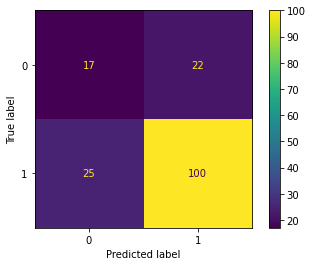

In [45]:
plot_confusion_matrix(model, X_test_fs, y_test)
plt.show()

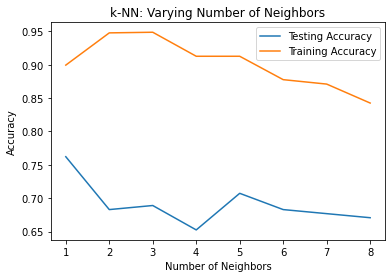

In [46]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_fs, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_fs, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_fs, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}


In [41]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch

clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_fs, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2
